<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/NEIL1_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
##### ## Uncomment these lines if running as a google colab notebook: 
#!pip install numpy==1.15
#! git clone https://github.com/kundajelab/adar_editing
#import os
#os.chdir("adar_editing/xgboost_with_shap/")
#!pip install shap
#!pip install --upgrade xgboost
#!pip install cufflinks
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [90]:
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [91]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap




## Neil1 xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#3>Computational Dataset</a></li>
    <li><a href=#4>Computational Dataset Feature Subsets</a></li>
    <li><a href=#5>Exclude mut features</a></li>
 </ol>


## Neil1 Computational features <a name='3'>
<a href=#outline>Home</a>

In [92]:
import pandas as pd 
import xgboost
data=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#impute missing features 
#data=pd.read_csv("../missing_feature_imputation/neil1.computational.imputed.tsv",header=0,sep='\t',index_col=0)


In [93]:
data.head()

editing_value  minimum_free_energy  ensemble_free_energy  \
rna_id                                                             
1                0.58                -40.1                -41.29   
2                0.46                -38.5                -39.30   
3                0.49                -39.1                -40.32   
4                0.48                -44.1                -44.78   
5                0.59                -40.8                -41.45   

        mfe_frequency  ensemble_diversity  sim_nor_score  \
rna_id                                                     
1            0.143877               29.39         0.7426   
2            0.274518               10.93         0.9125   
3            0.138271               28.24         0.9301   
4            0.331605                4.19         1.0000   
5            0.346702                8.25         0.7400   

        probability_active_conf  num_mutations  mut_exist  mut_type  ...  \
rna_id                                                               ...   
1                      0.137610              1          1  mismatch  ...   
2                      0.131799              1          1  mismatch  ...   
3                      0.065449              1          1  mismatch  ...   
4                      0.321958              1          1  mismatch  ...   
5                      0.169233              1          1  mismatch  ...   

        d3_length_stem  d3_length_hairpin d3_length_bulge  \
rna_id                                                      
1                    9                NaN             NaN   
2                    5                NaN             NaN   
3                    5                NaN             NaN   
4                    5                NaN             NaN   
5                    9                NaN             NaN   

       d3_length_internal_es d3_length_internal_ecs d3_5prm_cp_hairpin  \
rna_id                                                                   
1                        NaN                    NaN                NaN   
2                        NaN                    NaN                NaN   
3                        NaN                    NaN                NaN   
4                        NaN                    NaN                NaN   
5                        NaN                    NaN                NaN   

       d3_5prm_cp_bulge d3_3prm_cp_bulge  d3_5prm_cp_internal  \
rna_id                                                          
1                   NaN              NaN                  NaN   
2                   NaN              NaN                  NaN   
3                   NaN              NaN                  NaN   
4                   NaN              NaN                  NaN   
5                   NaN              NaN                  NaN   

        d3_3prm_cp_internal  
rna_id                       
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
5                       NaN  

[5 rows x 126 columns]

In [94]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [95]:
data=format_for_xgboost(data)

#set a random seed so code is reproducible 
random.seed(1234)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(434, 202)
{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 16, 59.0: 17, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 21}


In [96]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [97]:
#Remove any null features 
train_null=get_high_missingness_features(train_split,percent_missing=0.5)
eval_null=get_high_missingness_features(eval_split,percent_missing=0.5)
test_null=get_high_missingness_features(test_split,percent_missing=0.5)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [98]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

mut_ref_nt:A
site_5prm_cp_bulge:C:G
u3_3prm_cp_bulge
u1_length_hairpin
d2_length_bulge
d3_length_hairpin
site_3prm_cp_bulge:G:C
d1_3prm_cp_bulge
d3_length_internal_ecs
mut_prev_struct:M
site_prev_nt:C
d2_5prm_cp_bulge:A:U
d1_length_bulge
u2_length_bulge
u1_length_bulge
d3_3prm_cp_internal
u1_5prm_cp_bulge
d2_3prm_cp_bulge:U:G
site_next_struct:S
u1_length_internal_ecs
u3_5prm_cp_hairpin
d3_5prm_cp_hairpin
u2_3prm_cp_bulge:C:G
d1_distance
u1_5prm_cp_hairpin
d3_struct:S
u1_5prm_cp_internal
site_struct:M
d1_struct:S
d1_exist
u2_5prm_cp_bulge:G:U
u2_length_internal_ecs
d2_5prm_cp_bulge:U:A
mut_ref_struct:I
site_5prm_cp_internal:U:G
d2_5prm_cp_bulge:G:U
d2_3prm_cp_bulge:G:U
u2_3prm_cp_internal:G:U
d2_5prm_cp_bulge:U:G
mut_prev_struct:H
d2_3prm_cp_internal:G:U
site_next_nt:C
site_length_bulge
d3_5prm_cp_internal
site_prev_struct:S
site_length_hairpin
d2_5prm_cp_internal:A:U
d1_length_internal_es
u3_length_hairpin
u3_length_bulge
d3_5prm_cp_bulge
d1_5prm_cp_bulge
u2_5prm_cp_bulge:A:U
d3_exist


In [99]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [100]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [101]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(301, 106)
(301,)
(88, 106)
(88,)
(87, 106)
(87,)


In [102]:
## format matrixes for xgboost 
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [103]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [104]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [105]:
num_round = 1000
random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-auc:0.74161	eval-mae:0.19031	eval-map:1.00000	eval-aucpr:0.53194	eval-rmse:0.22255	train-auc:0.81913	train-mae:0.21220	train-map:1.00000	train-aucpr:0.57439	train-rmse:0.24638
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-auc:0.76615	eval-mae:0.14192	eval-map:1.00000	eval-aucpr:0.55426	eval-rmse:0.16804	train-auc:0.82733	train-mae:0.15530	train-map:1.00000	train-aucpr:0.58880	train-rmse:0.18164
[2]	eval-auc:0.77451	eval-mae:0.11915	eval-map:1.00000	eval-aucpr:0.55571	eval-rmse:0.14109	train-auc:0.83220	train-mae:0.11516	train-map:1.00000	train-aucpr:0.59316	train-rmse:0.13465
[3]	eval-auc:0.77886	eval-mae:0.09968	eval-map:1.00000	eval-aucpr:0.56076	eval-rmse:0.12164	train-auc:0.83399	train-mae:0.08701	train-map:1.00000	train-aucpr:0.59661	train-rmse:0.10255
[4]	eval-auc:0.78246	eval-mae:0.08550	eval-map:1.00000	eval-aucpr:0.56293	eval-rmse:0.10825	train-auc:0.83504	train

[44]	eval-auc:0.78916	eval-mae:0.05077	eval-map:1.00000	eval-aucpr:0.56776	eval-rmse:0.09254	train-auc:0.84322	train-mae:0.00373	train-map:1.00000	train-aucpr:0.60644	train-rmse:0.00573
[45]	eval-auc:0.78906	eval-mae:0.05079	eval-map:1.00000	eval-aucpr:0.56762	eval-rmse:0.09266	train-auc:0.84323	train-mae:0.00361	train-map:1.00000	train-aucpr:0.60645	train-rmse:0.00553
[46]	eval-auc:0.78910	eval-mae:0.05078	eval-map:1.00000	eval-aucpr:0.56765	eval-rmse:0.09266	train-auc:0.84323	train-mae:0.00345	train-map:1.00000	train-aucpr:0.60645	train-rmse:0.00532
[47]	eval-auc:0.78901	eval-mae:0.05070	eval-map:1.00000	eval-aucpr:0.56752	eval-rmse:0.09263	train-auc:0.84324	train-mae:0.00328	train-map:1.00000	train-aucpr:0.60647	train-rmse:0.00505
[48]	eval-auc:0.78927	eval-mae:0.05089	eval-map:1.00000	eval-aucpr:0.56786	eval-rmse:0.09294	train-auc:0.84324	train-mae:0.00308	train-map:1.00000	train-aucpr:0.60649	train-rmse:0.00471
[49]	eval-auc:0.78928	eval-mae:0.05085	eval-map:1.00000	eval-aucpr:0.5

Stopping. Best iteration:
[78]	eval-auc:0.78882	eval-mae:0.05068	eval-map:1.00000	eval-aucpr:0.56760	eval-rmse:0.09344	train-auc:0.84329	train-mae:0.00095	train-map:1.00000	train-aucpr:0.60661	train-rmse:0.00145



In [106]:
# save to binary file for faster loading
bst.save_model('neil1.computational.model')
# save model to text file 
bst.dump_model('neil1.computational.raw.txt')


In [107]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [108]:
#calculate R^2, which is representative of variance explained 
# https://datascienceplus.com/extreme-gradient-boosting-with-r/
# https://arxiv.org/pdf/1706.06060.pdf

residuals = test_y - test_pred

y_test_mean = np.mean(test_pred)
print(y_test_mean)
#calculate total sum of squares 
tss=sum((test_y-y_test_mean)*(test_y-y_test_mean))
print(tss)
# Calculate residual sum of squares
rss =  sum(residuals*residuals)
print(rss)
# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3), '\n')

0.30858386
5.49566340996143
0.6597313156398933
The R-square of the test data is  0.88 



In [109]:
## get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9987639494654184, pvalue=0.0)
	Pearson corr : (0.9999815608521967, 0.0)
	MAE : 0.0009519532801772146
	MAPE : 0.009642860431959225
	RMSE : 0.0014545974977772278
	auPRC : 1.0
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.9247098521662327, pvalue=7.834971961220175e-38)
	Pearson corr : (0.9246297359693445, 8.187623519906812e-38)
	MAE : 0.05068209622647952
	MAPE : 0.22676822723213563
	RMSE : 0.09344017964778181
	auPRC : 0.9850577821917024
	auROC : 0.9762803234501348
Test
	Spearman corr : SpearmanrResult(correlation=0.9340845287068484, pvalue=8.851364352075625e-40)
	Pearson corr : (0.9393940856549121, 2.7870111489741974e-41)
	MAE : 0.048791680061954196
	MAPE : 0.20111267897497398
	RMSE : 0.08708110340695899
	auPRC : 0.9718679964213914
	auROC : 0.9675824175824176


In [110]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9987639494654184, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.9247098521662327, pvalue=7.834971961220175e-38)
Test:SpearmanrResult(correlation=0.9340845287068484, pvalue=8.851364352075625e-40)


Pearson correlation:
Train:(0.9999815608521967, 0.0)
Eval:(0.9246297359693445, 8.187623519906812e-38)
Test:(0.9393940856549121, 2.7870111489741974e-41)


In [111]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0009519532801772146
MAE Eval:0.05068209622647952
MAE Test:0.048791680061954196


In [112]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:0.9642860431959225%
MAPE Eval:22.67682272321356%
MAPE Test:20.1112678974974%


In [113]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0014545974977772278
RMSE Eval:0.09344017964778181
RMSE Test:0.08708110340695899


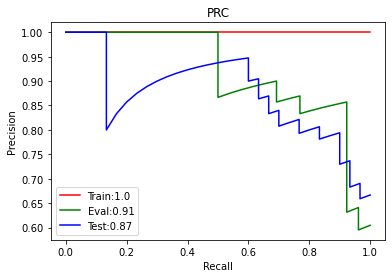

In [114]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

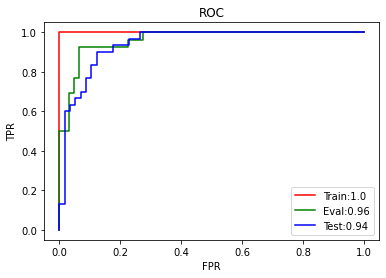

In [115]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

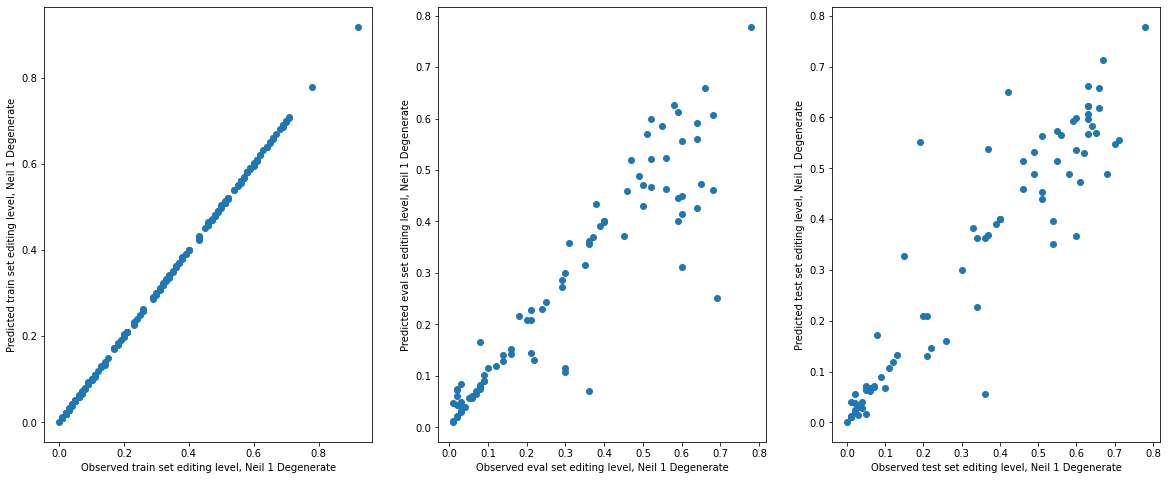

In [116]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

In [117]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':'NEIL1_COMP'})

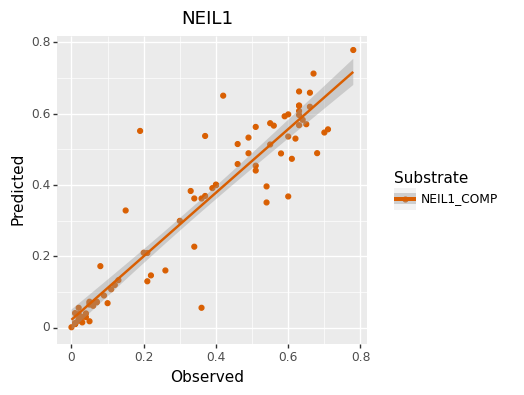

<ggplot: (8784150968373)>


In [118]:
plotnine.options.figure_size = (4, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#d95f02'],name="Substrate")
 + ggtitle("NEIL1"))
print(p)
ggsave(plot=p, filename='NEIL1.comp.substrate.pdf',width=4,height=4,units='in')


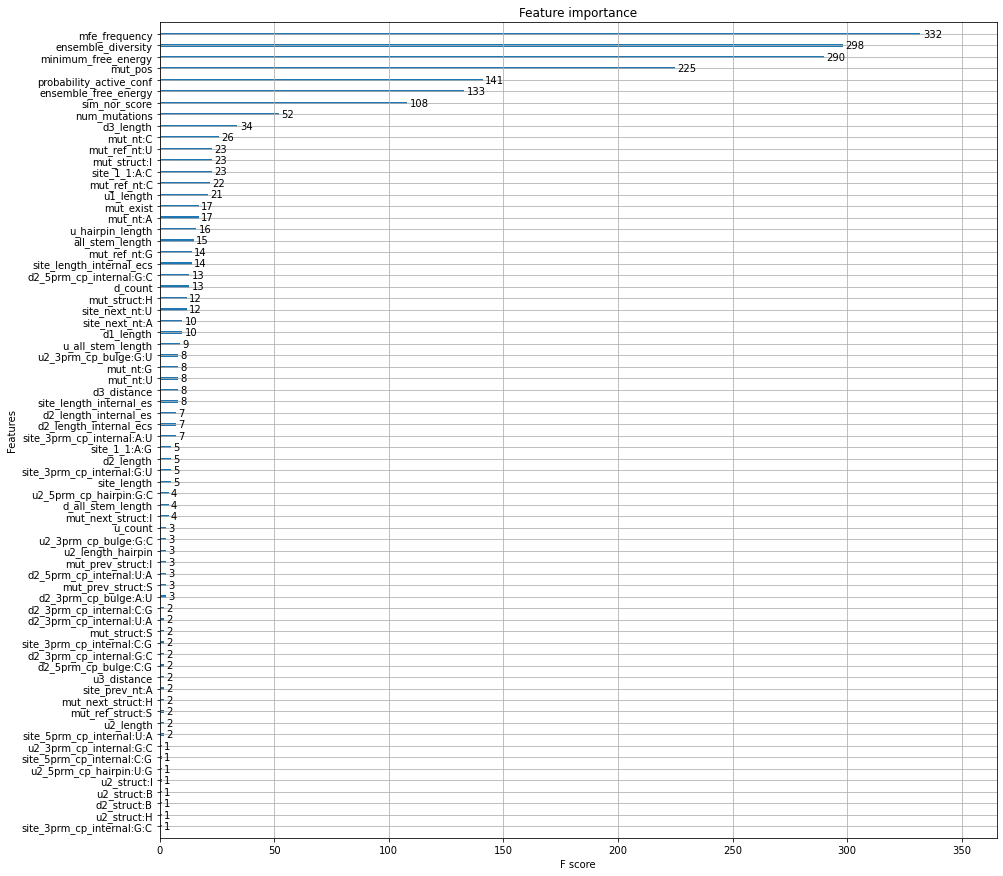

In [119]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

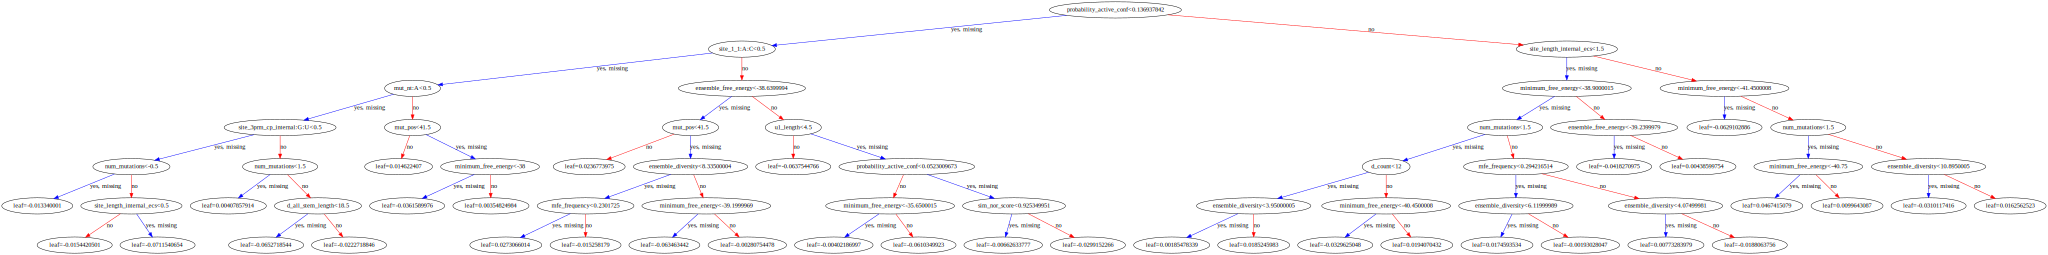

In [120]:
import graphviz
xgboost.to_graphviz(bst, num_trees=2)


In [121]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(87, 106)

In [122]:
test_X.iloc[6,:].shape

(106,)

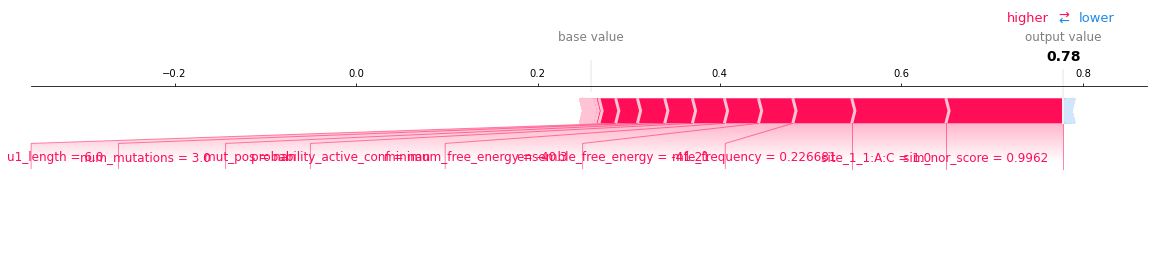

In [123]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
# visualize prediction for isoform with the highest editing level 
shap.initjs()
matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:],matplotlib=True,show=False)
plt.savefig("NEIL1.comp.visualize_prediction.highest.pdf", format='pdf', width=7, height=1, dpi=300, bbox_inches="tight")

In [124]:
 max(test_y['editing_value'])

0.78

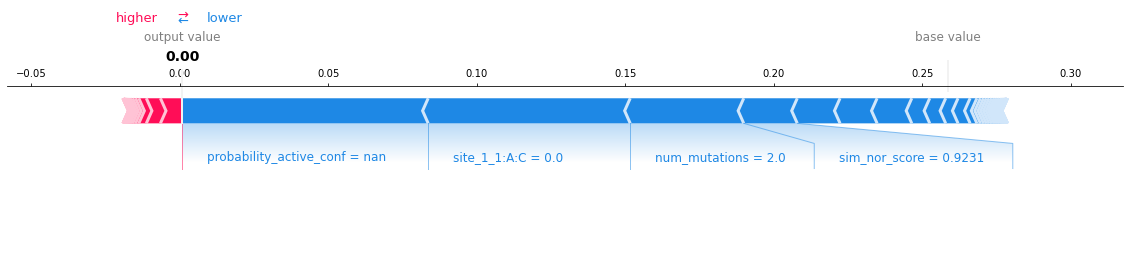

In [125]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:],matplotlib=True,show=False)
plt.savefig("NEIL1.comp.visualize_prediction.lowest.pdf", format='pdf', width=7, height=1, dpi=300, bbox_inches="tight")

In [126]:
 min(test_y['editing_value'])

0.0

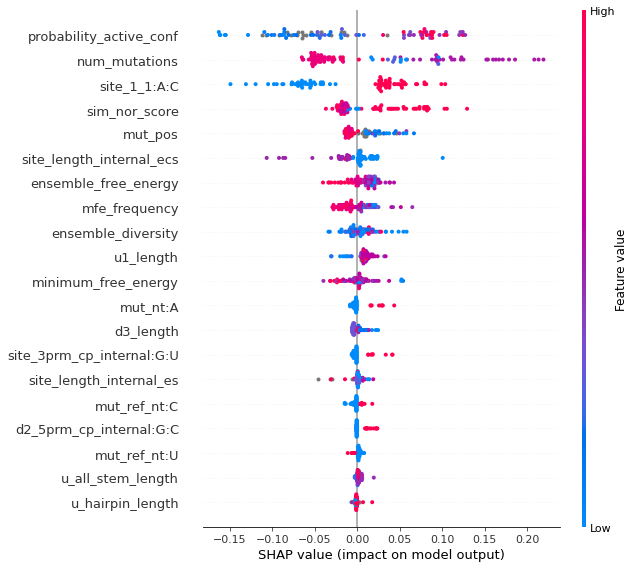

In [127]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X,show=False)
plt.savefig("NEIL1.comp.shap.pdf", format='pdf',width=20,height=10,dpi=300,bbox_inches="tight")


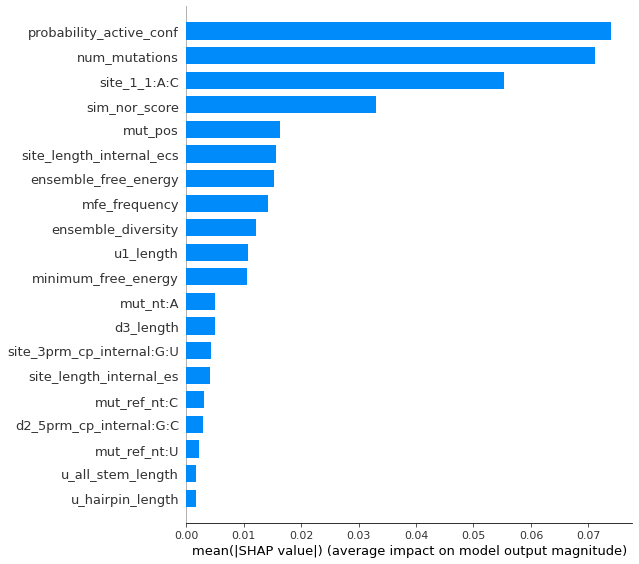

In [128]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [129]:
mean_abs_shap_vals=np.mean(abs(shap_values),axis=0)
features=test_X.columns
shap_dict=pd.DataFrame({'feature':features,
          'mean_abs_shap':mean_abs_shap_vals})
shap_dict.to_csv("NEIL1_comp_shap_mean_abs.txt",index=False,sep='\t')

In [130]:
shap_dict

feature  mean_abs_shap
0        minimum_free_energy       0.010666
1       ensemble_free_energy       0.015281
2              mfe_frequency       0.014285
3         ensemble_diversity       0.012119
4              sim_nor_score       0.032998
..                       ...            ...
101  d2_3prm_cp_internal:U:A       0.000001
102  d2_3prm_cp_internal:U:G       0.000000
103              d3_distance       0.001686
104                d3_length       0.004958
105           d3_length_stem       0.000000

[106 rows x 2 columns]

In [131]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(87, 106, 106)

In [132]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [133]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [134]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
#configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Computational Dataset: Feature Subsets<a name='4'>
<a href=#outline>Home</a>

In [135]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['site_prev_nt*', 'site_next_nt*']


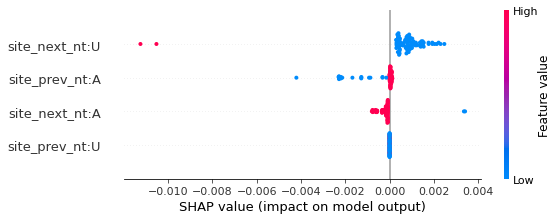

Contribution/Total:0.005119346
['free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'minimum_free_energy*', 'ensemble_free_energy*', 'mfe_frequency*', 'ensemble_diversity*']


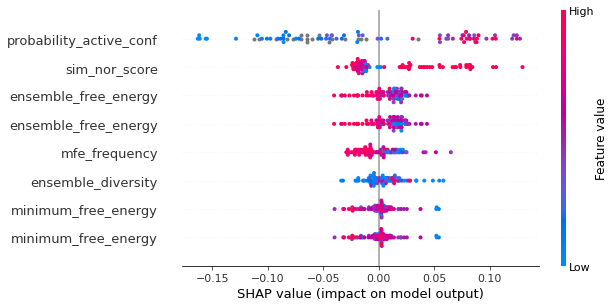

Contribution/Total:0.4896925
['u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*']


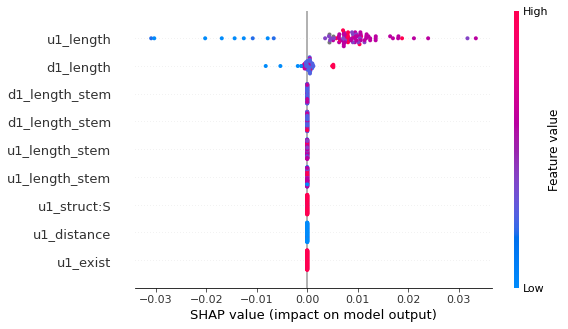

Contribution/Total:0.030848103
['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


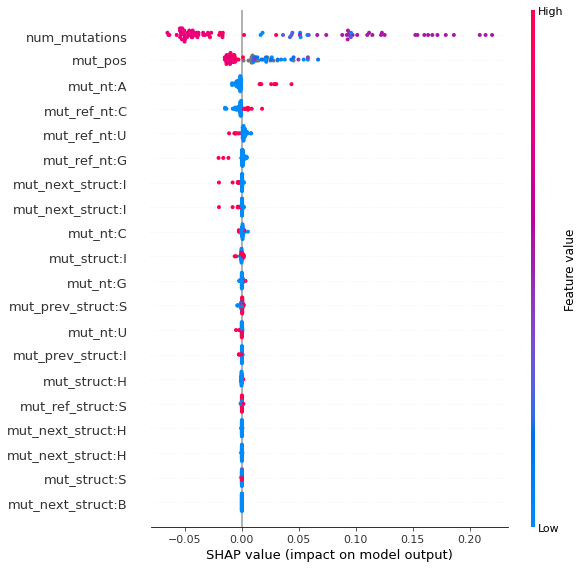

Contribution/Total:0.27500015
['site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


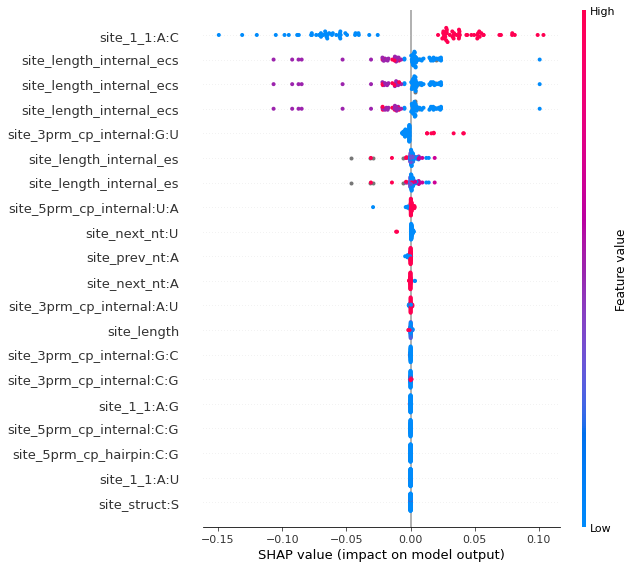

Contribution/Total:0.3143047
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


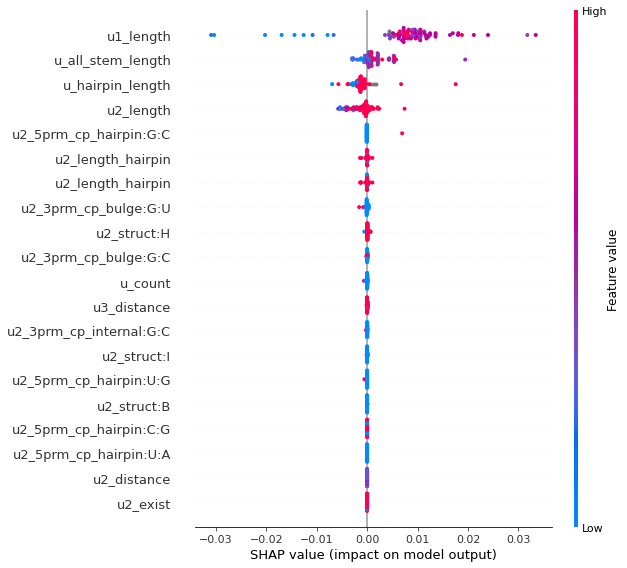

Contribution/Total:0.043758824
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length*', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length*', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


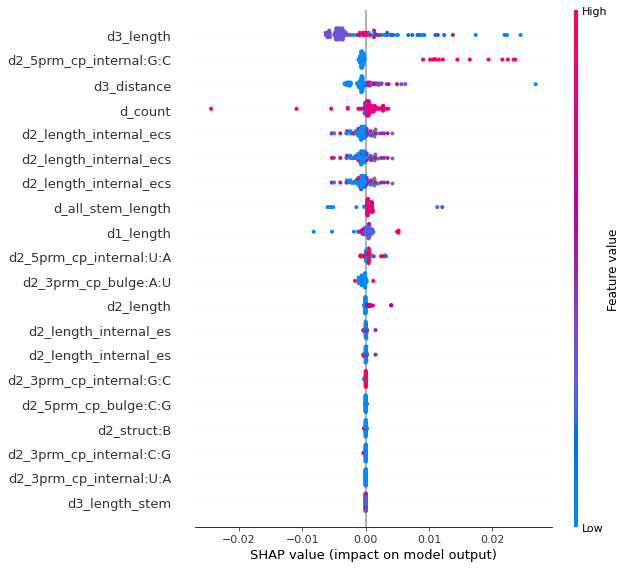

Contribution/Total:0.046809424
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*'

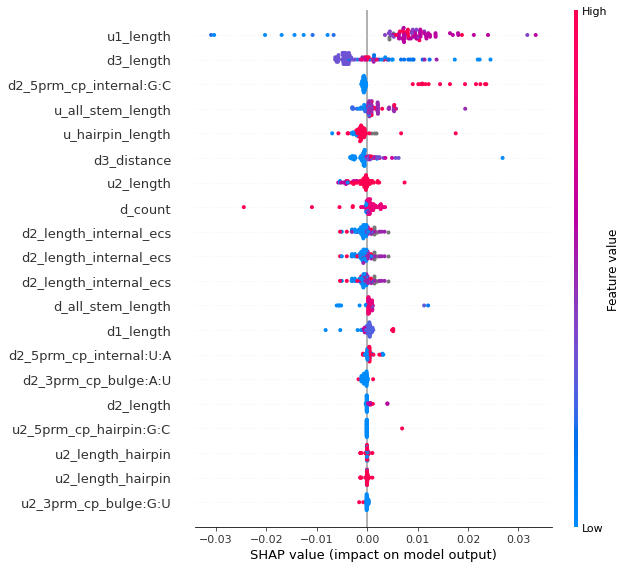

Contribution/Total:0.090568244
['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


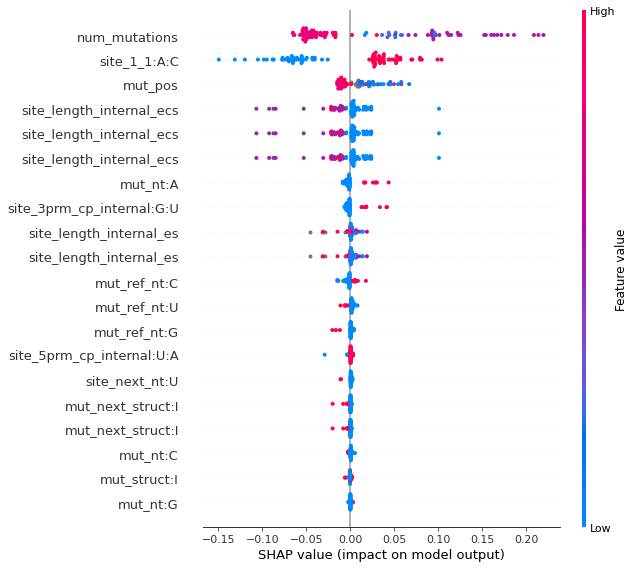

Contribution/Total:0.58930486
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_

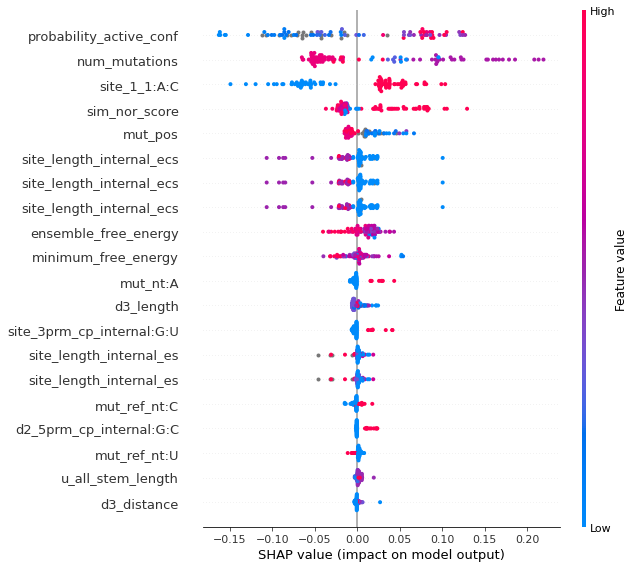

Contribution/Total:0.9959733
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 

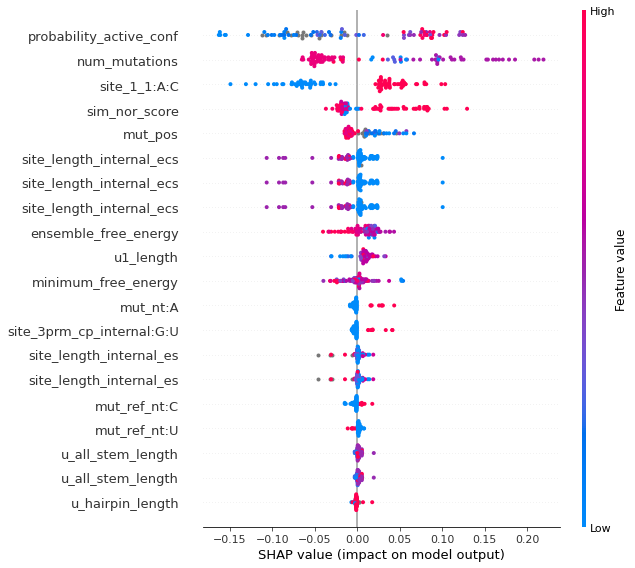

Contribution/Total:0.9929228
['site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


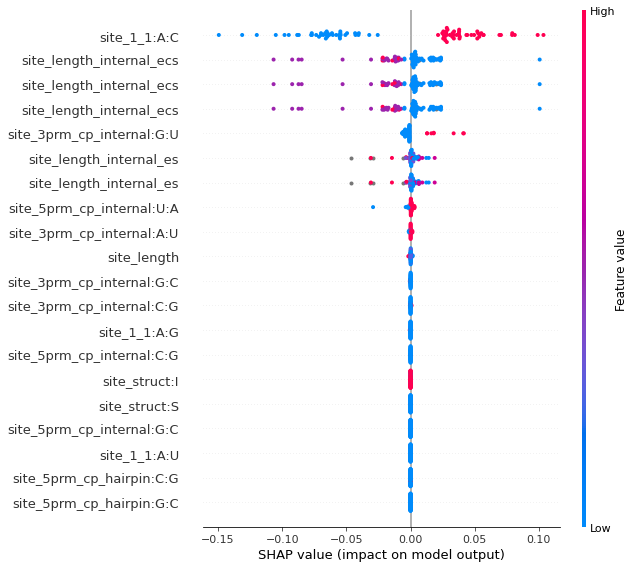

Contribution/Total:0.3091854
['site_prev_nt*', 'site_next_nt*']


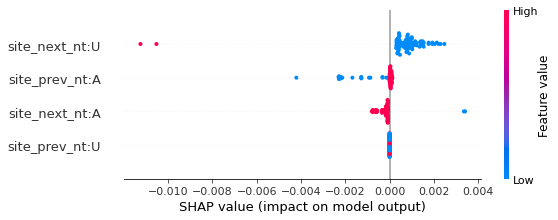

Contribution/Total:0.005119346
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*']


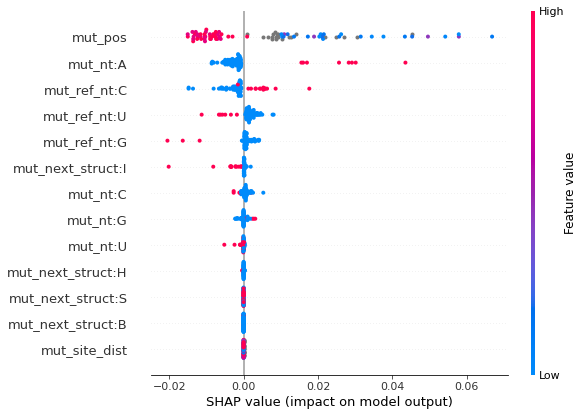

Contribution/Total:0.080479145
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'site_prev_nt*', 'site_next_nt*']


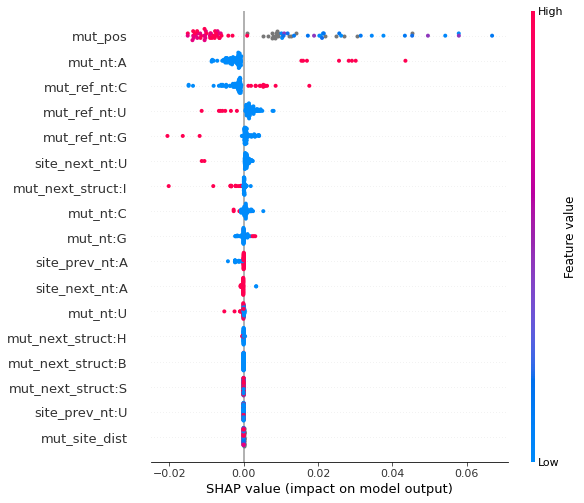

Contribution/Total:0.085598506
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_

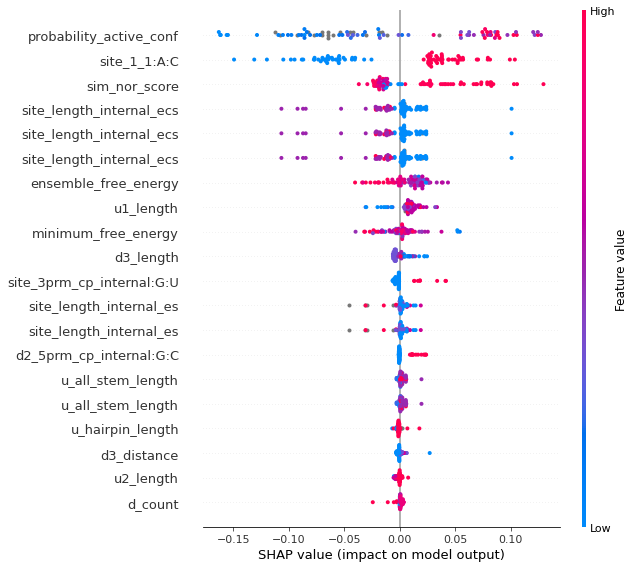

Contribution/Total:0.764732
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*']


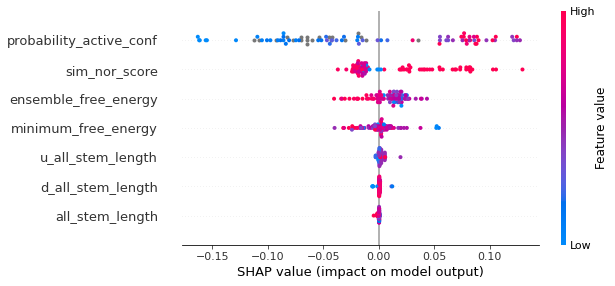

Contribution/Total:0.35985902


In [136]:
from feature_subsets import * 
subset_names=["sub_site_seq","thermodynamic","u1_d1","mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [sub_site_seq,thermodynamic, u1_d1,mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=test_X[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [137]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [138]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 

In [139]:
from pandas.api.types import CategoricalDtype


In [140]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)


In [141]:
subset_contrib_df

Subset  Contribution         Subset_Cat
0               no_up     99.597329              no_up
1             no_down     99.292278            no_down
2              no_mut     76.473200             no_mut
3            mut_site     58.930486           mut_site
4       thermodynamic     48.969251      thermodynamic
5   overall_structure     35.985902  overall_structure
6                site     31.430471               site
7         site_struct     30.918539        site_struct
8                 mut     27.500015                mut
9                 u_d      9.056824                u_d
10       mut_seq_site      8.559851       mut_seq_site
11            mut_seq      8.047915            mut_seq
12                  d      4.680942                  d
13                  u      4.375882                  u
14              u1_d1      3.084810              u1_d1
15           site_seq      0.511935           site_seq
16       sub_site_seq      0.511935       sub_site_seq

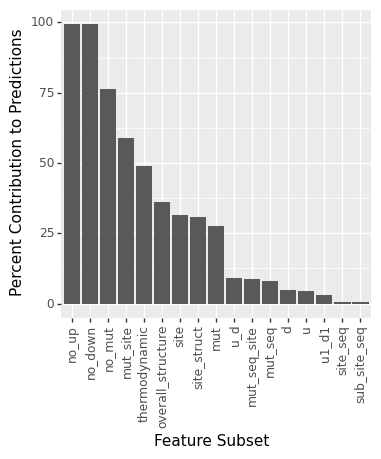

<ggplot: (8784307988461)>

In [142]:
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + ylab("Percent Contribution to Predictions")
 + theme(axis_text_x=element_text(angle=90))
)
ggsave(plot=p, filename='NEIL1.comp.subset.importance.pdf',format='pdf',width=5,height=4,units='in')
p

## No Mut Features <a name='5'>
<a href=#outline>Home</a>

In [55]:
## Read in the data 
import feature_subsets
import pandas as pd 
data=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#drop all mut features
cur_features=filter_features(data,feature_subsets.mut)
cur_features.remove('mut_pos')
data=data.drop(cur_features,axis=1)
#data.head


In [56]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [57]:
data=format_for_xgboost(data)

#set a random seed so code is reproducible 
random.seed(1234)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(434, 175)
{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 16, 59.0: 17, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 21}


In [58]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [59]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [60]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append("mut_pos")
print("\n".join(to_drop))

site_5prm_cp_bulge:C:G
u3_3prm_cp_bulge
u1_length_hairpin
d2_length_bulge
d3_length_hairpin
site_3prm_cp_bulge:G:C
d1_3prm_cp_bulge
d1_length_bulge
d3_length_internal_ecs
site_prev_nt:C
d2_5prm_cp_bulge:A:U
u2_length_bulge
u1_length_bulge
d3_3prm_cp_internal
u1_5prm_cp_bulge
d2_3prm_cp_bulge:U:G
site_next_struct:S
u1_length_internal_ecs
u3_5prm_cp_hairpin
d3_5prm_cp_hairpin
u2_3prm_cp_bulge:C:G
d1_distance
u1_5prm_cp_hairpin
d3_struct:S
u1_5prm_cp_internal
site_struct:M
d1_struct:S
d1_exist
u2_5prm_cp_bulge:G:U
u2_length_internal_ecs
d2_5prm_cp_bulge:U:A
site_5prm_cp_internal:U:G
d2_5prm_cp_bulge:G:U
d2_3prm_cp_bulge:G:U
u2_3prm_cp_internal:G:U
d2_5prm_cp_bulge:U:G
d2_3prm_cp_internal:G:U
site_next_nt:C
site_length_bulge
d3_5prm_cp_internal
site_prev_struct:S
site_length_hairpin
d2_5prm_cp_internal:A:U
d1_length_internal_es
u3_length_hairpin
u3_length_bulge
d3_5prm_cp_bulge
d1_5prm_cp_bulge
u2_5prm_cp_bulge:A:U
d3_exist
u3_length
u3_length_internal_es
site_struct:B
u2_length_internal_e

In [61]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [62]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [63]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(301, 85)
(301,)
(88, 85)
(88,)
(87, 85)
(87,)


In [64]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [65]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [66]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [67]:
num_round = 1000
random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-auc:0.71920	eval-mae:0.20279	eval-map:1.00000	eval-aucpr:0.50258	eval-rmse:0.23467	train-auc:0.79727	train-mae:0.22005	train-map:1.00000	train-aucpr:0.53757	train-rmse:0.25330
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-auc:0.74758	eval-mae:0.16408	eval-map:1.00000	eval-aucpr:0.53748	eval-rmse:0.18678	train-auc:0.82265	train-mae:0.16251	train-map:1.00000	train-aucpr:0.57240	train-rmse:0.18690
[2]	eval-auc:0.74540	eval-mae:0.13809	eval-map:1.00000	eval-aucpr:0.53607	eval-rmse:0.16291	train-auc:0.82875	train-mae:0.12162	train-map:1.00000	train-aucpr:0.58594	train-rmse:0.14008
[3]	eval-auc:0.74455	eval-mae:0.11967	eval-map:1.00000	eval-aucpr:0.53524	eval-rmse:0.15217	train-auc:0.83083	train-mae:0.09292	train-map:1.00000	train-aucpr:0.58970	train-rmse:0.10801
[4]	eval-auc:0.75587	eval-mae:0.10409	eval-map:1.00000	eval-aucpr:0.54113	eval-rmse:0.14037	train-auc:0.83400	train

[44]	eval-auc:0.76254	eval-mae:0.06331	eval-map:1.00000	eval-aucpr:0.54849	eval-rmse:0.13914	train-auc:0.84325	train-mae:0.00349	train-map:1.00000	train-aucpr:0.60642	train-rmse:0.00504
[45]	eval-auc:0.76245	eval-mae:0.06324	eval-map:1.00000	eval-aucpr:0.54834	eval-rmse:0.13913	train-auc:0.84327	train-mae:0.00333	train-map:1.00000	train-aucpr:0.60649	train-rmse:0.00469
[46]	eval-auc:0.76224	eval-mae:0.06319	eval-map:1.00000	eval-aucpr:0.54820	eval-rmse:0.13922	train-auc:0.84327	train-mae:0.00320	train-map:1.00000	train-aucpr:0.60652	train-rmse:0.00449
[47]	eval-auc:0.76240	eval-mae:0.06301	eval-map:1.00000	eval-aucpr:0.54835	eval-rmse:0.13918	train-auc:0.84327	train-mae:0.00303	train-map:1.00000	train-aucpr:0.60652	train-rmse:0.00419
[48]	eval-auc:0.76197	eval-mae:0.06289	eval-map:1.00000	eval-aucpr:0.54811	eval-rmse:0.13914	train-auc:0.84328	train-mae:0.00290	train-map:1.00000	train-aucpr:0.60653	train-rmse:0.00401
[49]	eval-auc:0.76198	eval-mae:0.06284	eval-map:1.00000	eval-aucpr:0.5

Stopping. Best iteration:
[78]	eval-auc:0.76280	eval-mae:0.06173	eval-map:1.00000	eval-aucpr:0.54873	eval-rmse:0.13922	train-auc:0.84329	train-mae:0.00078	train-map:1.00000	train-aucpr:0.60661	train-rmse:0.00111



In [68]:
# save to binary file for faster loading
bst.save_model('neil1.computational.nomut.model')
# save model to text file 
bst.dump_model('neil1.computational.nomut.raw.txt')


In [69]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [70]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9987724097653231, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8538451232526245, pvalue=4.114947576918918e-26)
Test:SpearmanrResult(correlation=0.8985697799024397, pvalue=3.7710374646729447e-32)


Pearson correlation:
Train:(0.9999900388425841, 0.0)
Eval:(0.8258648781641033, 4.125846996068453e-23)
Test:(0.8880802590190074, 1.975046180997314e-30)


In [71]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0007770294767875605
MAE Eval:0.06173421027308161
MAE Test:0.059952054804769055


In [72]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:0.6655980774246966%
MAPE Eval:17.743526890126137%
MAPE Test:20.02703029164091%


In [73]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0011106065423626946
RMSE Eval:0.13921694250907535
RMSE Test:0.119014428096813


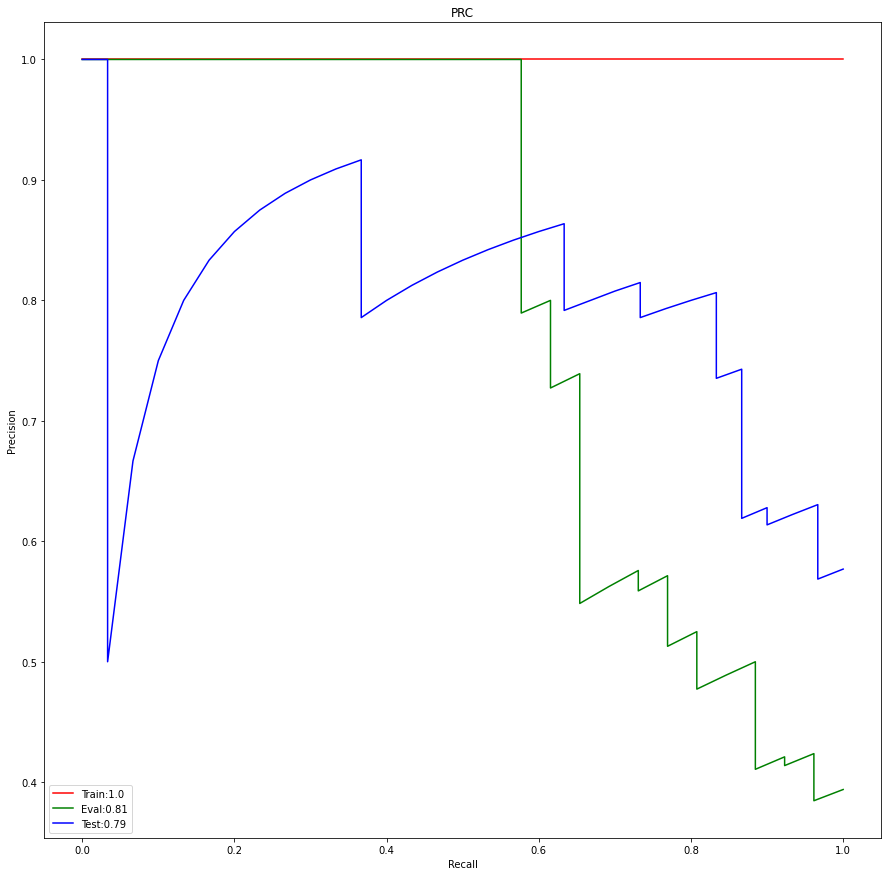

In [74]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.5,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.5,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.5,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

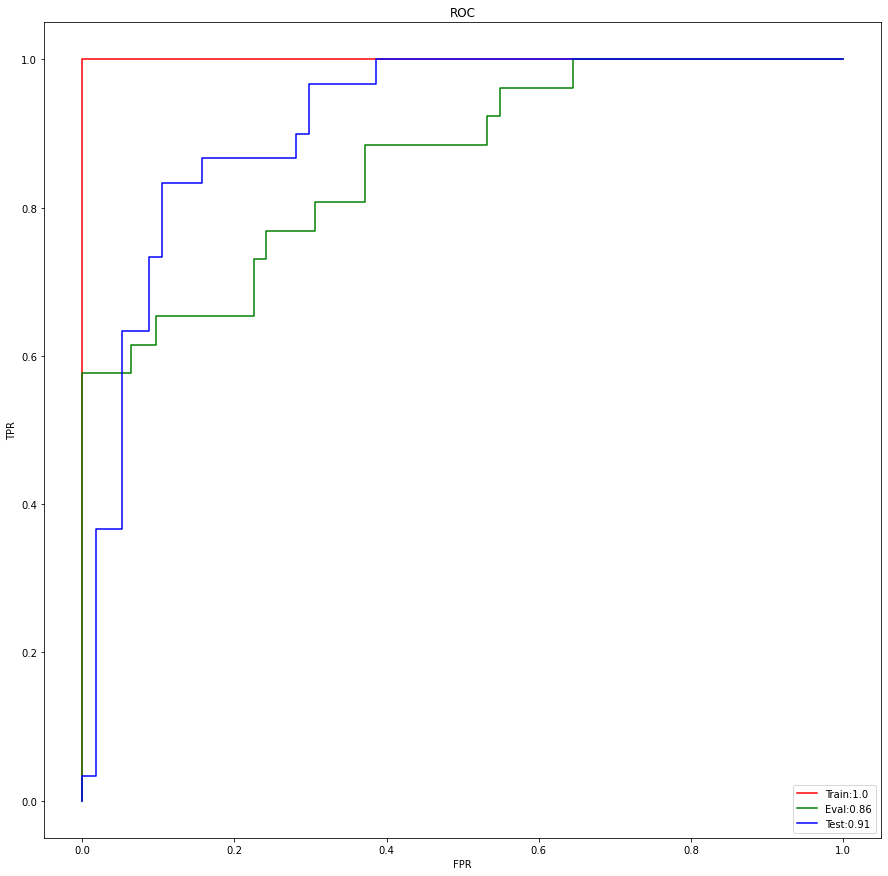

In [75]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.5,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.5,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.5,test_pred)

auroc_train=roc_auc_score(train_y>=0.5,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.5,eval_pred)
auroc_test=roc_auc_score(test_y>=0.5,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

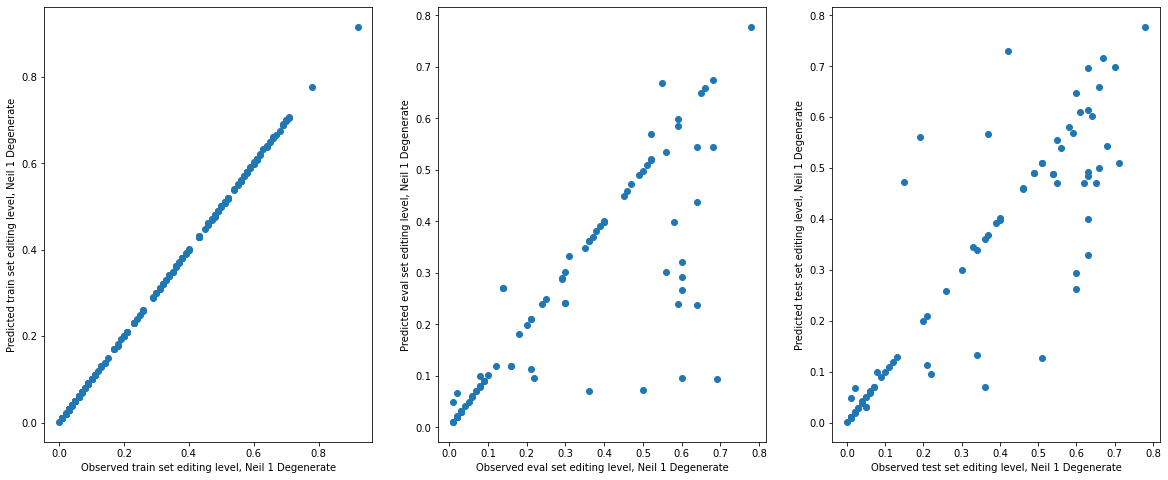

In [76]:
#plot the test set predictions 
import matplotlib 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted train set editing level, Neil 1 Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted eval set editing level, Neil 1 Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, Neil 1 Degenerate")
plt.ylabel("Predicted test set editing level, Neil 1 Degenerate")

plt.show()

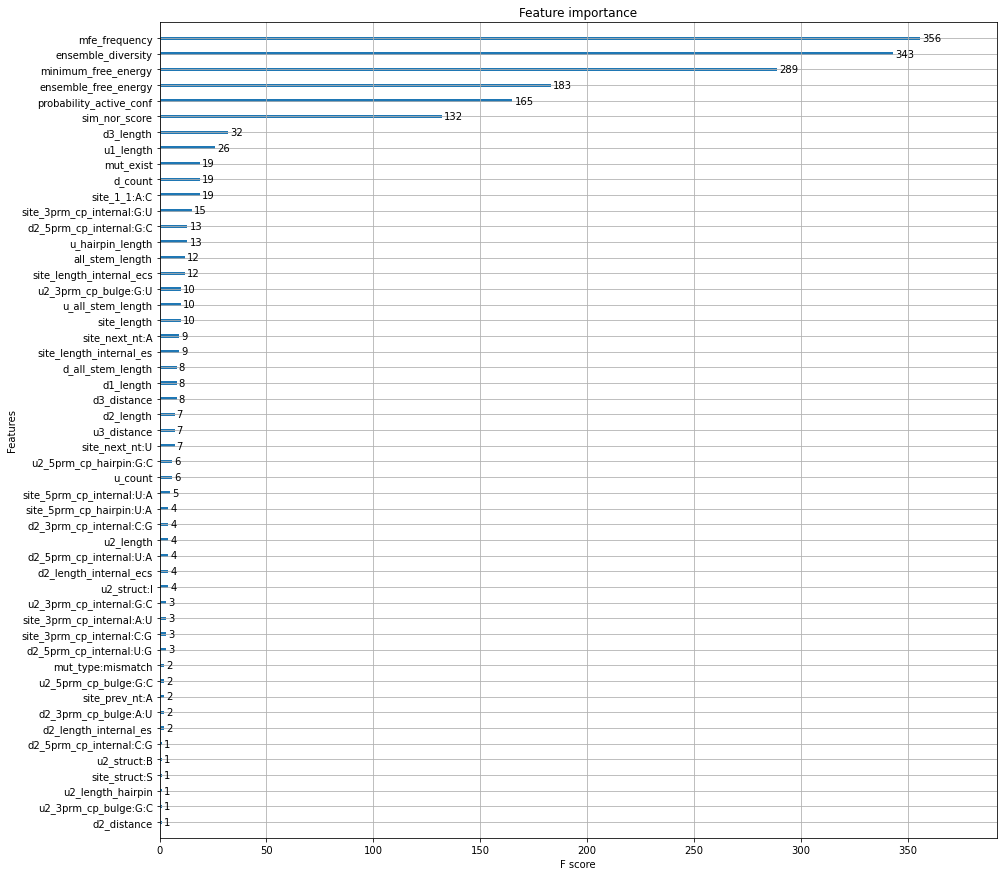

In [77]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

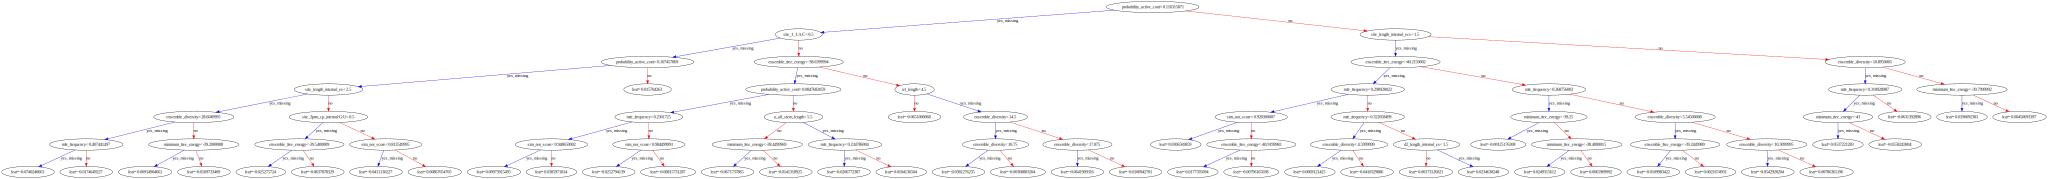

In [78]:
xgboost.to_graphviz(bst, num_trees=2)


In [79]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(87, 85)

In [80]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
#shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [81]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [82]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

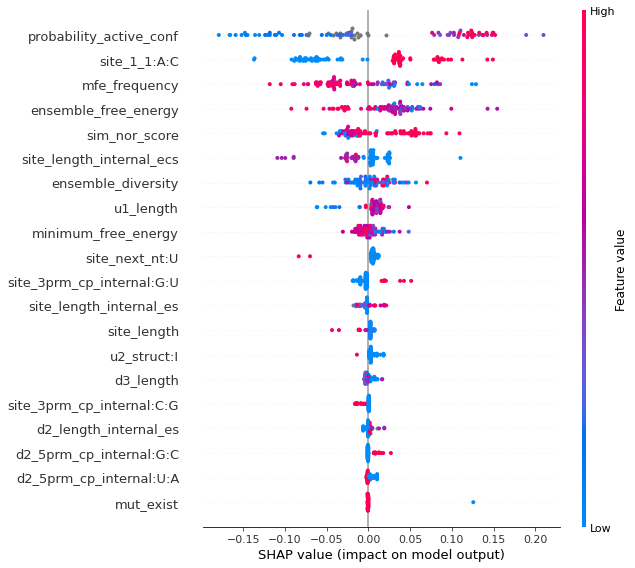

In [83]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X)


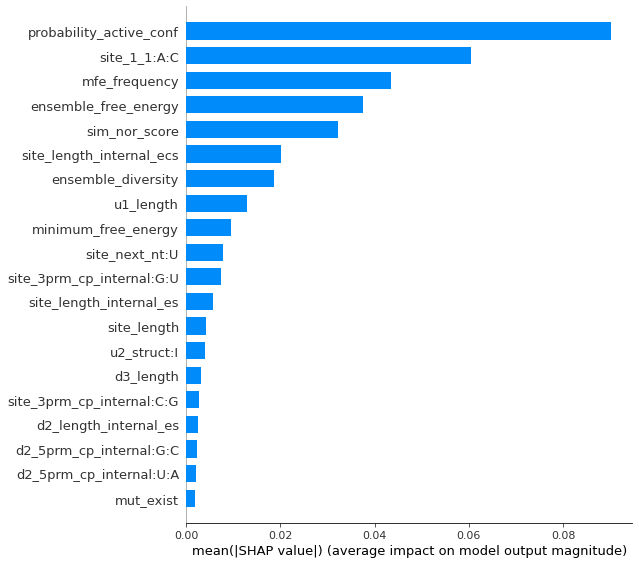

In [84]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [85]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(87, 85, 85)

In [86]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [87]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [88]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)
